In [18]:
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape

(93686, 3)

DROP EMPTY CELLS

In [20]:
train_df = train_df.dropna()
test_df = test_df.dropna()
train_df.shape

(87074, 3)

DROP DUPLICATE CELLS

In [21]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
train_df.shape

(82018, 3)

EDA

                      category        sub_category  \
count                    82018               82018   
unique                      11                  35   
top     Online Financial Fraud  UPI Related Frauds   
freq                     52496               23526   

                                       crimeaditionalinfo  
count                                               82018  
unique                                              81189  
top                                                   ...  
freq                                                   11  


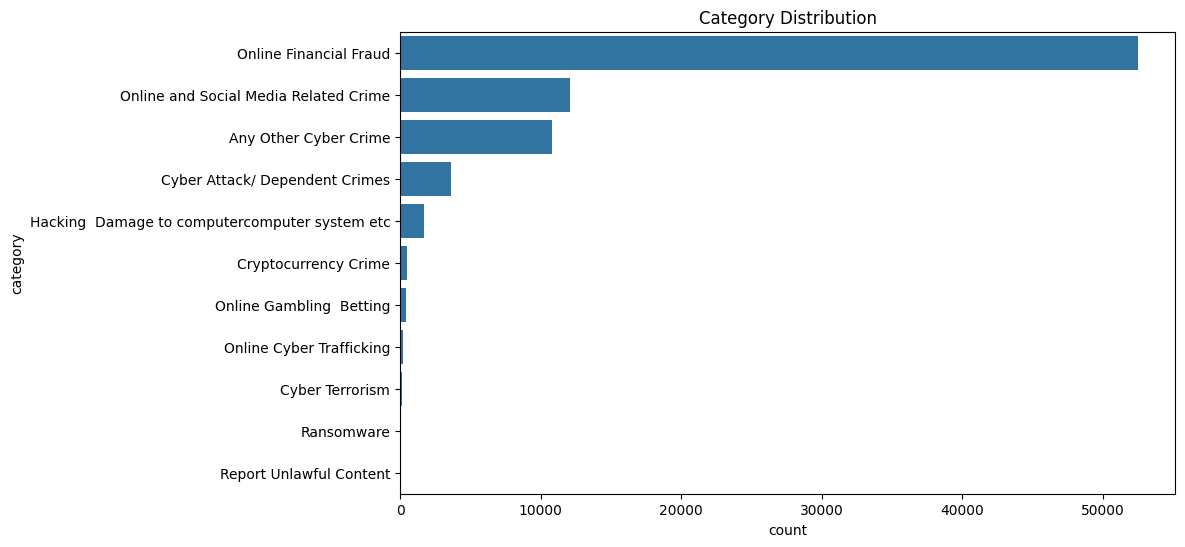

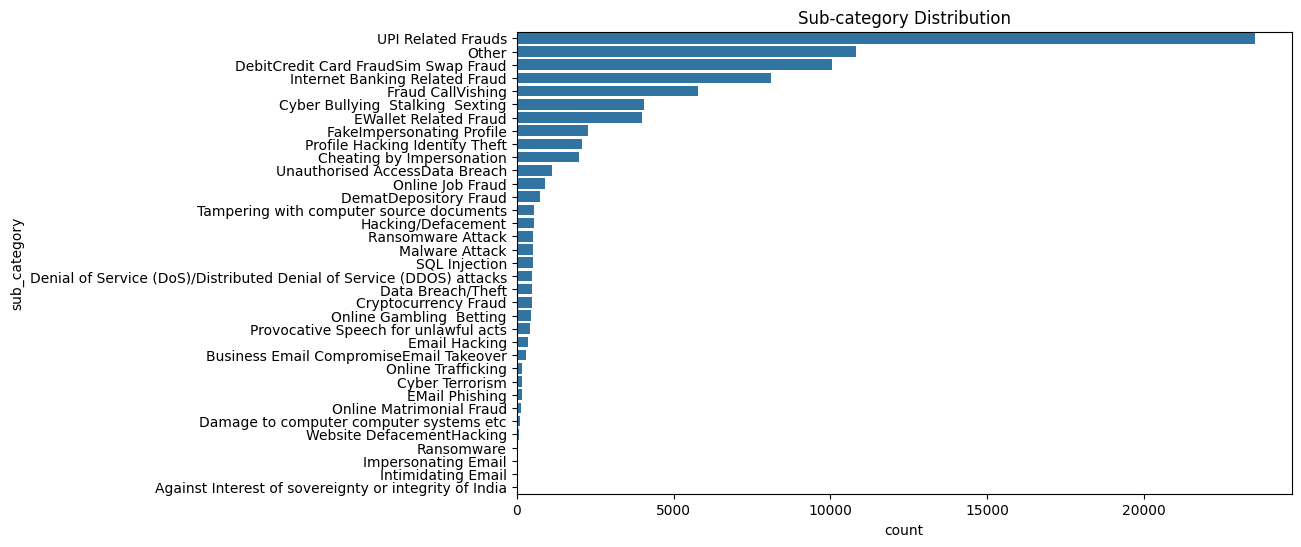

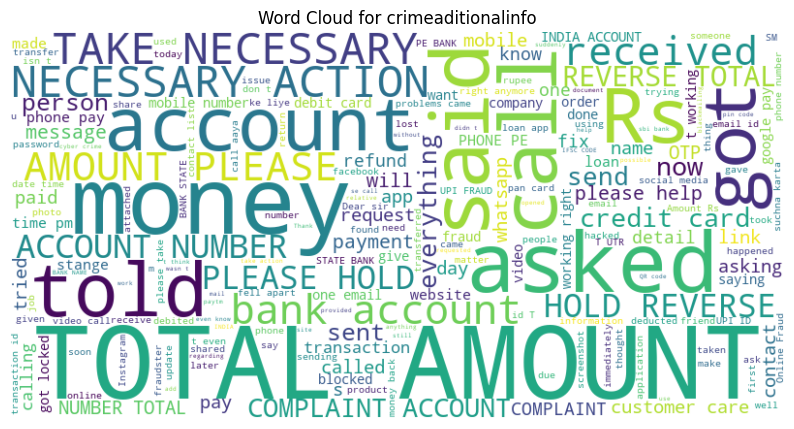

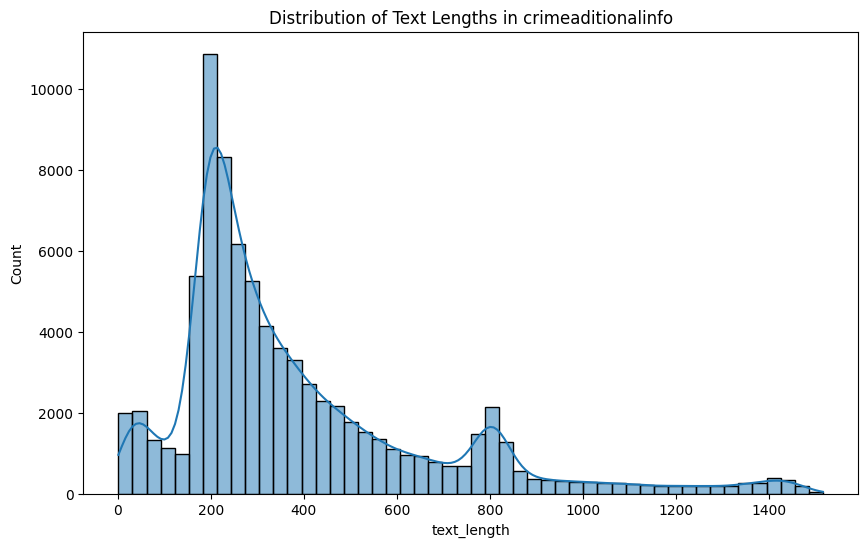

In [22]:
import seaborn as sns
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Basic statistics
print(train_df.describe())

# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_df, order=train_df['category'].value_counts().index)
plt.title('Category Distribution')
plt.show()

# Sub-category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='sub_category', data=train_df, order=train_df['sub_category'].value_counts().index)
plt.title('Sub-category Distribution')
plt.show()

# Word frequency analysis
all_words = ' '.join([text for text in train_df['crimeaditionalinfo']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for crimeaditionalinfo')
plt.show()

# Length of text analysis
train_df['text_length'] = train_df['crimeaditionalinfo'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths in crimeaditionalinfo')
plt.show()

Text Cleaning

In [33]:

# Initialize stopwords and lemmatizer outside functions to avoid re-initialization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    # Remove URLs, special characters, numbers, and extra spaces
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#|\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return re.sub(r'\s+', ' ', text).strip()

# Tokenization and normalization function
def tokenize_and_normalize(text):
    # Tokenize, lowercase, remove stopwords, and lemmatize
    tokens = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

# Apply the cleaning function and tokenization
train_df['cleaned_text'] = train_df['crimeaditionalinfo'].map(clean_text)
train_df['tokens'] = train_df['cleaned_text'].map(tokenize_and_normalize)

# Display the output
print(train_df[['crimeaditionalinfo', 'cleaned_text','tokens']].head())


                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                        cleaned_text  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                              tokens  
0  [continue, received, random, call, abusive, me...  
1  [fraudster, continuously, messaging, asking, p...  
2  [acting, like, police, demanding, money, addin...  
3  [apna, job, applied, job, interview, telecalli...  
4  [received, call, lady, stating, send, new, pho..

In [44]:
train_df.columns
train_df = train_df.drop(columns=['text_length', 'text_length_cleaned'])

In [45]:
train_df

,category,sub_category,crimeaditionalinfo,cleaned_text,tokens
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,I had continue received random calls and abusi...,"[continue, received, random, call, abusive, me..."
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,The above fraudster is continuously messaging ...,"[fraudster, continuously, messaging, asking, p..."
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,He is acting like a police and demanding for m...,"[acting, like, police, demanding, money, addin..."
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,In apna Job I have applied for job interview f...,"[apna, job, applied, job, interview, telecalli..."
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,I received a call from lady stating that she w...,"[received, call, lady, stating, send, new, pho..."
...,...,...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,Identity theft Smishing SMS Fraud CreditDebit ...,"[identity, theft, smishing, sm, fraud, creditd..."
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,RECEIVED CALL FROM NUMBER ASKING ABOUT phone p...,"[received, call, number, asking, phone, pay, c..."
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,Cyber Stalking Blackmailing PhoneSMSVOIP Calls...,"[cyber, stalking, blackmailing, phonesmsvoip, ..."
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,Call karke bola ki aapka lotary laga ha aru AC...,"[call, karke, bola, ki, aapka, lotary, laga, h..."


In [47]:
print(train_df['tokens'][0])

['continue', 'received', 'random', 'call', 'abusive', 'message', 'whatsapp', 'someone', 'added', 'number', 'unknown', 'facebook', 'group', 'name', 'girl', 'still', 'getting', 'call', 'unknown', 'number', 'pls', 'help', 'sort', 'issue', 'soon', 'possible', 'thank']
